# Linear Regression Predictor / CSC 578D / Fall 2018

### Notes:
1. See notes by hand __[here](http://www.apkc.net/_9)__.

**Author:** Andreas P. Koenzen <akoenzen@uvic.ca>
<br>
**Version:** 0.1

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Salary-Experience example:
- E = Experience in years. ($X$ = Predictor or Feature or Independent Variable)
- S = Salary in thousands of CAD. ($Y$ = Response or Outcome or Dependent Variable) Not to be confused with the Predicted Value $\hat{Y}$.

The data for this notebook is artificially generated by sampling from a Uniform distribution. Use the Gaussian distribution to sample values for C to compute the value of Y in order to introduce more variation.

Text(0.5,0,'Years of Experience')

Text(0,0.5,'Salary')

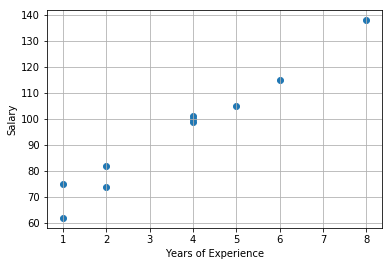

In [125]:
# generate the data
rng = np.random.RandomState(1) # seed the random function to obtain the same numbers
sample_number = 10

# load data into X and Y
X = 10 * (rng.rand(sample_number) + 0.1)
Y = 10 * (1.0 * X + 5.0 + rng.rand(sample_number))

# convert the data to integers
X = X.astype(int)
Y = Y.astype(int)

# plot the data
plt.scatter(X, Y)
plt.grid(True)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [126]:
print('Values:')
data = pd.DataFrame({'X': X, 'Y': Y})
data

Values:


,X,Y
0,5,105
1,8,138
2,1,62
3,4,99
4,2,74
5,1,75
6,2,82
7,4,100
8,4,101
9,6,115


### Compute the weights of the line:

Do N iterations and compute the error.

In [127]:
debug = False
iterations = 500
kappa = 0.1

# initialize vector w to all 1.0
w = np.array([[1.0, 1.0]])
# w
E = 0

for k in range(0, iterations):
    # build the x vector. remember that it is the dummy value and the value of feature N.
    # in this case it should be a 2D vector.
    x0 = np.ones((len(X), 1), dtype=float)
    x = np.hstack([x0, X[:, np.newaxis]])
    if k + 1 == iterations and debug:
        x
    
    y = Y[:, np.newaxis]
    
    # compute the Mean Square Error
    E = (1 / (2 * len(X))) * np.sum(((y - (x @ w.T)) ** 2), axis=0, keepdims=True)
    E = np.asscalar(E)
    if k + 1 == iterations and debug:
        E
    if (k + 1) % 50 == 0:
        print("Iteration: {0} => Error: {1}".format(k + 1, E))
        
    # re-compute the weights using gradient descent
    g = (1 / len(X)) * np.sum(((y - (x @ w.T)) * x), axis=0, keepdims=True)
    if k + 1 == iterations and debug:
        g
    
    # update the weights
    w = w + (kappa * g)
    
w
E

Iteration: 50 => Error: 40.86086176233402
Iteration: 100 => Error: 10.17609043828013
Iteration: 150 => Error: 7.545350515968571
Iteration: 200 => Error: 7.318029874926935
Iteration: 250 => Error: 7.298387145734406
Iteration: 300 => Error: 7.296689821596124
Iteration: 350 => Error: 7.296543156170857
Iteration: 400 => Error: 7.296530482842009
Iteration: 450 => Error: 7.296529387742303
Iteration: 500 => Error: 7.296529293114964


array([[59.0387855 ,  9.74625719]])

7.296529293114964

### Plot the line:

Text(0.5,0,'Years of Experience')

Text(0,0.5,'Salary')

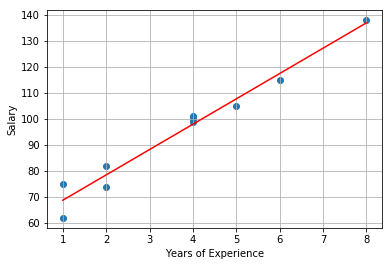

In [128]:
# plot the data
plt.scatter(X, Y)
plt.grid(True)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# plot line equation
plt.plot(
    range(1, 9),
    [(k * np.squeeze(w)[1] + np.squeeze(w)[0]) for k in range(1, 9)],
    c= "red"
)